# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 637


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()
    

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

# Convert the city_data list to a DataFrame
weather_df = pd.DataFrame(city_data)
print(weather_df.head())

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | motygino
Processing Record 2 of Set 1 | gamay
Processing Record 3 of Set 1 | toliara
Processing Record 4 of Set 1 | puerto baquerizo moreno
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | susuman
Processing Record 7 of Set 1 | sarandi del yi
Processing Record 8 of Set 1 | puerto natales
Processing Record 9 of Set 1 | westport
Processing Record 10 of Set 1 | fale old settlement
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | fort mcmurray
Processing Record 13 of Set 1 | papatowai
Processing Record 14 of Set 1 | constantia
Processing Record 15 of Set 1 | bilibino
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | wailua homesteads
Processing Record 18 of Set 1 | masindi port
Processing Record 19 of Set 1 | kerikeri
Processing Record 20 of Set 1 | swakopmund
Processing Record 21 of Set 1 | olonkinbyen
Processing Record 22 of Set 1

In [4]:


# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
print(city_data_df.count())

# Display the DataFrame
print(city_data_df)


City          608
Lat           608
Lng           608
Max Temp      608
Humidity      608
Cloudiness    608
Wind Speed    608
Country       608
Date          608
dtype: int64
                                City      Lat       Lng  Max Temp  Humidity  \
0                           motygino  58.1831   94.7592      2.10        98   
1                              gamay  12.3854  125.2979     24.19        95   
2                            toliara -23.3500   43.6667     20.97        61   
3            puerto baquerizo moreno  -0.9000  -89.6000     26.55        65   
4                          adamstown -25.0660 -130.1015     21.17        70   
..                               ...      ...       ...       ...       ...   
603  marine corps base hawaii - mcbh  21.4453 -157.7513     27.98        70   
604                          niquero  20.0431  -77.5828     31.29        59   
605                          harstad  68.7990   16.5293     17.36        88   
606                           palma

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,motygino,58.1831,94.7592,2.10,98,100,4.47,RU,1717017270
1,gamay,12.3854,125.2979,24.19,95,100,1.35,PH,1717017270
2,toliara,-23.3500,43.6667,20.97,61,0,4.74,MG,1717017270
3,puerto baquerizo moreno,-0.9000,-89.6000,26.55,65,20,6.17,EC,1717017271
4,adamstown,-25.0660,-130.1015,21.17,70,100,3.01,PN,1717017087


In [14]:
import os

# Define the output directory
output_dir = "output_data"

# Check if the directory exists, if not, create it
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Export the City_Data into a CSV file
city_data_df.to_csv(os.path.join(output_dir, "cities.csv"), index_label="City_ID")

print(f"Data has been saved to {os.path.join(output_dir, 'cities.csv')}")

Data has been saved to output_data/cities.csv


In [15]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,motygino,58.1831,94.7592,2.10,98,100,4.47,RU,1717017270
1,gamay,12.3854,125.2979,24.19,95,100,1.35,PH,1717017270
2,toliara,-23.3500,43.6667,20.97,61,0,4.74,MG,1717017270
3,puerto baquerizo moreno,-0.9000,-89.6000,26.55,65,20,6.17,EC,1717017271
4,adamstown,-25.0660,-130.1015,21.17,70,100,3.01,PN,1717017087


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

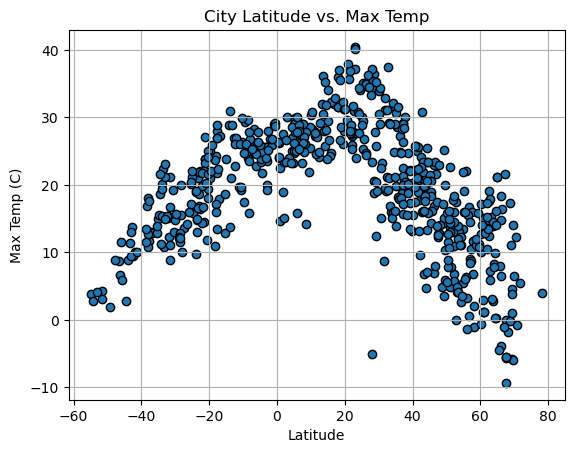

In [18]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor='black')

# Incorporate the other graph properties

plt.title("City Latitude vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.grid(True)

# Save the figure
plt.savefig(os.path.join(output_dir, "Fig1.png"))

# Show plot
plt.show()

#### Latitude Vs. Humidity

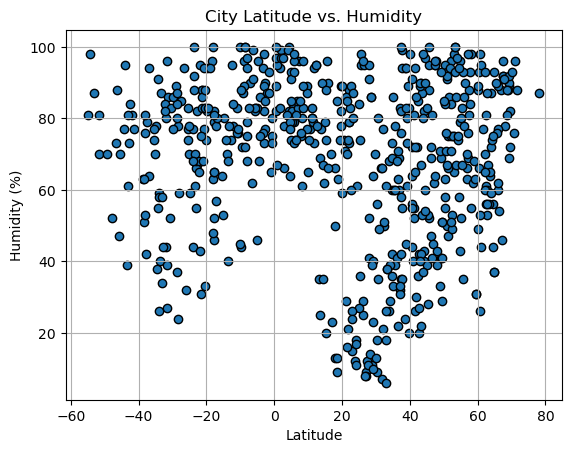

In [20]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig(os.path.join(output_dir, "Fig2.png"))

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

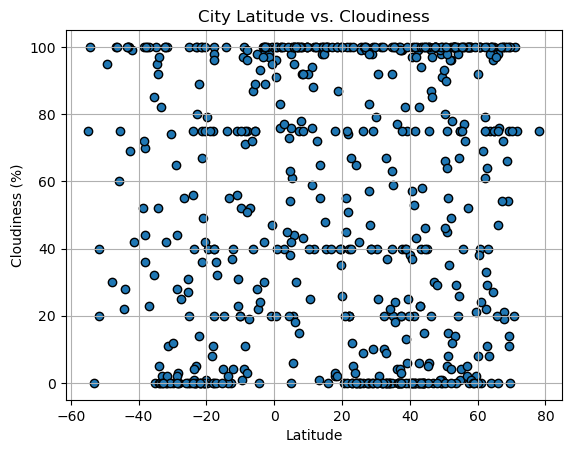

In [21]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig(os.path.join(output_dir, "Fig3.png"))

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

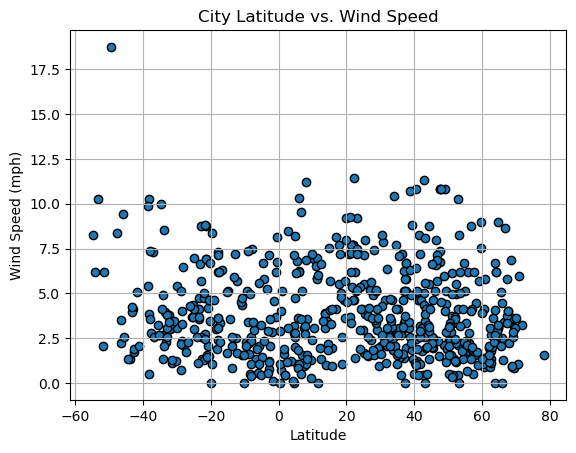

In [22]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig(os.path.join(output_dir, "Fig4.png"))

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [27]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import os


# Define a function to create Linear Regression plots
def create_linear_regression_plot(x, y, x_label, y_label, title, output_path):
    """
    Create a scatter plot with a linear regression line.

    Parameters:
    x (array-like): Independent variable values.
    y (array-like): Dependent variable values.
    x_label (str): Label for the x-axis.
    y_label (str): Label for the y-axis.
    title (str): Title of the plot.
    output_path (str): Path to save the plot.
    """
    # Perform linear regression
    (slope, intercept, r_value, p_value, std_err) = linregress(x, y)
    
    # Create regression line values
    regression_line = slope * np.array(x) + intercept

    # Plot the scatter plot
    plt.scatter(x, y, edgecolor='black')
    plt.plot(x, regression_line, "r", label=f"y={slope:.2f}x+{intercept:.2f}")

    # Incorporate other graph properties
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    plt.grid(True)

    # Save the figure
    plt.savefig(output_path)

    # Show plot
    plt.show()

In [28]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,motygino,58.1831,94.7592,2.10,98,100,4.47,RU,1717017270
1,gamay,12.3854,125.2979,24.19,95,100,1.35,PH,1717017270
5,susuman,62.7833,148.1667,7.21,53,29,2.68,RU,1717017244
8,westport,41.1415,-73.3579,25.72,52,0,4.63,US,1717017061
11,fort mcmurray,56.7268,-111.3810,16.77,63,100,8.75,CA,1717017275


In [29]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,toliara,-23.3500,43.6667,20.97,61,0,4.74,MG,1717017270
3,puerto baquerizo moreno,-0.9000,-89.6000,26.55,65,20,6.17,EC,1717017271
4,adamstown,-25.0660,-130.1015,21.17,70,100,3.01,PN,1717017087
6,sarandi del yi,-33.3500,-55.6333,10.74,87,82,2.29,UY,1717017272
7,puerto natales,-51.7236,-72.4875,4.25,70,40,2.06,CL,1717017240


###  Temperature vs. Latitude Linear Regression Plot

Slope: -0.37847741198364626
Intercept: 33.69588631179336
R-squared value: 0.5352320824496284


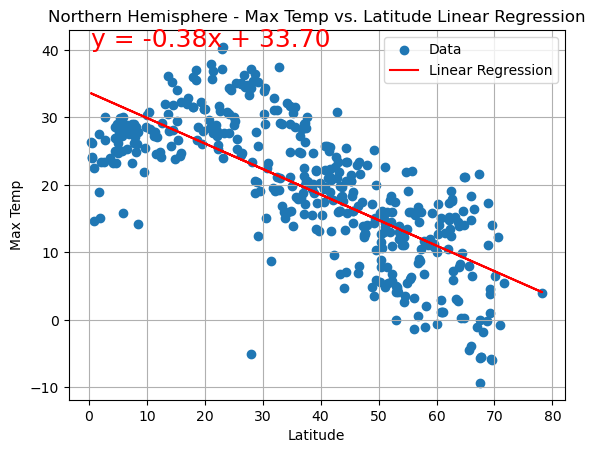

In [36]:
# Linear regression on Northern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

# Print the regression results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared value: {r_value**2}")

# Plot the regression line
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], label='Data')
plt.plot(northern_hemi_df["Lat"], slope * northern_hemi_df["Lat"] + intercept, color='red', label='Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.legend()
plt.grid(True)

# Regression equation
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(equation, (northern_hemi_df["Lat"].min(), northern_hemi_df["Max Temp"].max()), fontsize=18, color='red')


# Show the plot
plt.show()

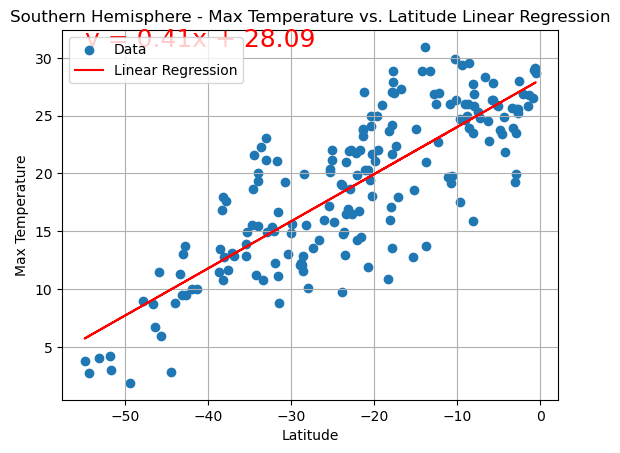

In [37]:
# Linear regression on Southern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

# Plot the regression line
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], label='Data')
plt.plot(southern_hemi_df["Lat"], slope * southern_hemi_df["Lat"] + intercept, color='red', label='Linear Regression')

# Regression equation
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(equation, (southern_hemi_df["Lat"].min(), southern_hemi_df["Max Temp"].max()), fontsize=18, color='red')

plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Southern Hemisphere - Max Temperature vs. Latitude Linear Regression')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

**Discussion about the linear relationship:** 

My analysis looked at how latitude affects the maximum temperature in the Northern and Southern Hemispheres. In the North, temperatures drop as you move further from the equator, while in the South, temperatures rise. 

The R-squared values show how well the models explain temperature changes based on latitude. This confirms that temperature changes as you move north or south, which matches what we know about climate. Other things like altitude and how close you are to water also play a role in regional temperatures. 

Basically, the linear relationships shows that latitude has a big impact on the temperature in both hemispheres.

### Humidity vs. Latitude Linear Regression Plot

Slope: 0.014136745407920837
Intercept: 66.04867603183936
R-squared value: 0.00012394800779256613


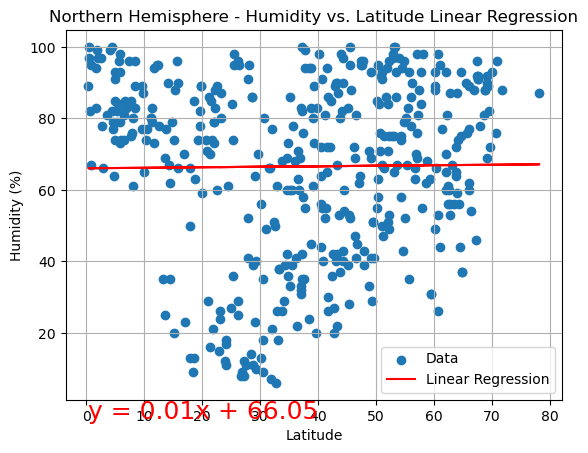

In [39]:
# Northern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

# Print the regression results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared value: {r_value**2}")

# Plot the scatter plot
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], label='Data')

# Plot the regression line
plt.plot(northern_hemi_df["Lat"], slope * northern_hemi_df["Lat"] + intercept, color='red', label='Linear Regression')

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.legend()
plt.grid(True)

# Regression equation and R-squared value
equation = f'y = {slope:.2f}x + {intercept:.2f}'
r_squared = f'R-squared: {r_value**2:.2f}'
plt.text(northern_hemi_df["Lat"].min(), northern_hemi_df["Humidity"].min() - 10, equation, fontsize=18, color='red')


# Show the plot
plt.show()

Slope: 0.30142569163171307
Intercept: 80.23545676770009
R-squared value: 0.052852364116935655


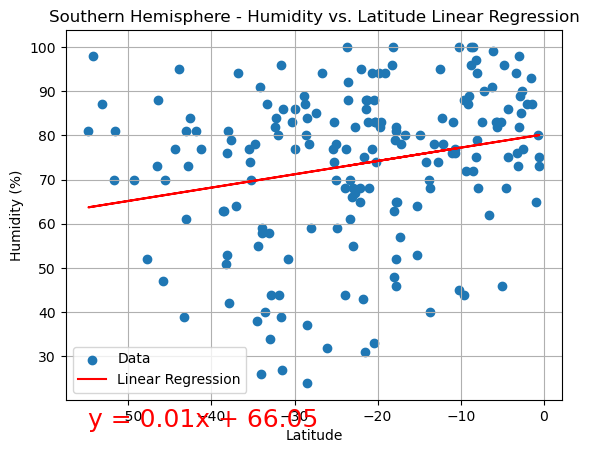

In [40]:
# Southern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

# Print the regression results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared value: {r_value**2}")

# Plot the scatter plot
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], label='Data')

# Plot the regression line
plt.plot(southern_hemi_df["Lat"], slope * southern_hemi_df["Lat"] + intercept, color='red', label='Linear Regression')

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.legend()
plt.grid(True)

# Regression equation and R-squared value
r_squared = f'R-squared: {r_value**2:.2f}'
plt.text(southern_hemi_df["Lat"].min(), southern_hemi_df["Humidity"].min() - 10, equation, fontsize=18, color='red')

# Show the plot
plt.show()

**Discussion about the linear relationship:** 

In the Northern Hemisphere, I found that there's basically no real connection between humidity and latitude. The slope was super tiny at 0.0141, and the intercept was around 66.05, showing the base humidity at the equator. But the R-squared value was only 0.00012, meaning latitude doesn't really explain much of the humidity differences.

On the flip side, the Southern Hemisphere showed a much stronger link between humidity and latitude. The slope was 0.3014, meaning humidity goes up a good amount with each degree of latitude. The intercept was about 80.24, showing the base humidity at the equator down south. The R-squared value was 0.0529, meaning latitude explains about 5.29% of the humidity changes.

So, basically, the North and South Hemispheres have different humidity trends when it comes to latitude. Latitude plays a bigger role in humidity levels in the Southern Hemisphere compared to the Northern Hemisphere.

Overall, this analysis gives us a good idea of how humidity levels change with latitude in both hemispheres. But remember, things like how close a place is to water, how high up it is, and the local geography can also affect humidity levels.

### Cloudiness vs. Latitude Linear Regression Plot

Slope: -0.07002529030100028
Intercept: 57.448222251103324
R-squared value: 0.0011568693350940819


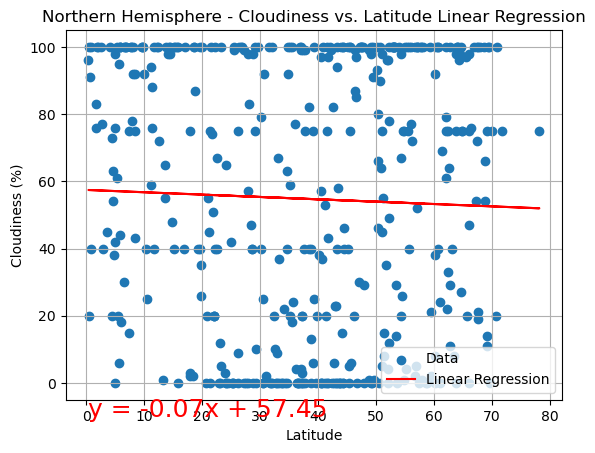

In [43]:
# Northern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

# Plot the scatter plot
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], label='Data')

# Print the regression results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared value: {r_value**2}")

# Plot the regression line
plt.plot(northern_hemi_df["Lat"], slope * northern_hemi_df["Lat"] + intercept, color='red', label='Linear Regression')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.legend()
plt.grid(True)

# Annotate the plot with the regression equation and R-squared value
equation = f'y = {slope:.2f}x + {intercept:.2f}'
r_squared = f'R-squared: {r_value**2:.2f}'
plt.text(northern_hemi_df["Lat"].min(), northern_hemi_df["Cloudiness"].min() - 10, equation, fontsize=18, color='red')


# Show the plot
plt.show()

Slope: 0.08652466529532492
Intercept: 50.32724104167119
R-squared value: 0.0008951764372855609


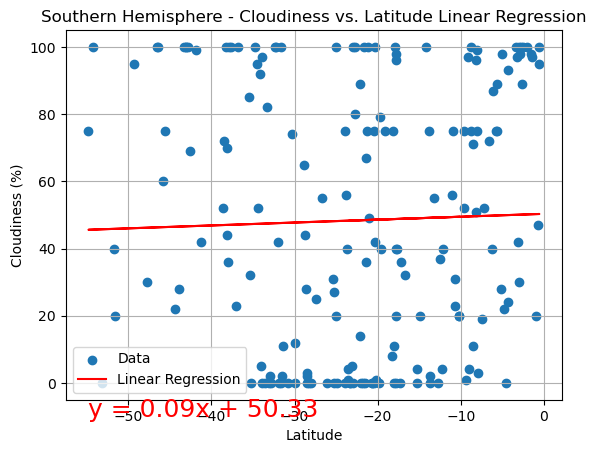

In [44]:
# Southern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

# Print the regression results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared value: {r_value**2}")

# Plot the scatter plot
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], label='Data')

# Plot the regression line
plt.plot(southern_hemi_df["Lat"], slope * southern_hemi_df["Lat"] + intercept, color='red', label='Linear Regression')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.legend()
plt.grid(True)

# Regression equation and R-squared value
equation = f'y = {slope:.2f}x + {intercept:.2f}'
r_squared = f'R-squared: {r_value**2:.2f}'
plt.text(southern_hemi_df["Lat"].min(), southern_hemi_df["Cloudiness"].min() - 10, equation, fontsize=18, color='red')

# Show the plot
plt.show()

**Discussion about the linear relationship:** 

In the Southern Hemisphere, the linear regression analysis indicates a weak negative correlation between cloudiness and latitude. The slope of approximately -0.070 suggests a slight decrease in cloudiness with increasing latitude. However, the intercept value of around 57.45 suggests the baseline cloudiness at the equator in the Southern Hemisphere. The R-squared value, approximately 0.0012, suggests that latitude explains only a very small fraction of the variability in cloudiness.

In the Northern Hemisphere, the linear regression analysis reveals a very weak positive relationship between cloudiness and latitude. The positive slope of approximately 0.02 indicates a marginal increase in cloudiness with increasing latitude. The intercept value of around 50.75 suggests the baseline cloudiness at the equator. However, the low R-squared value of approximately 0.0006 indicates that latitude alone explains very little of the variability in cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

Slope: -0.013329204273822955
Intercept: 4.326621606776728
R-squared value: 0.010555833502562086


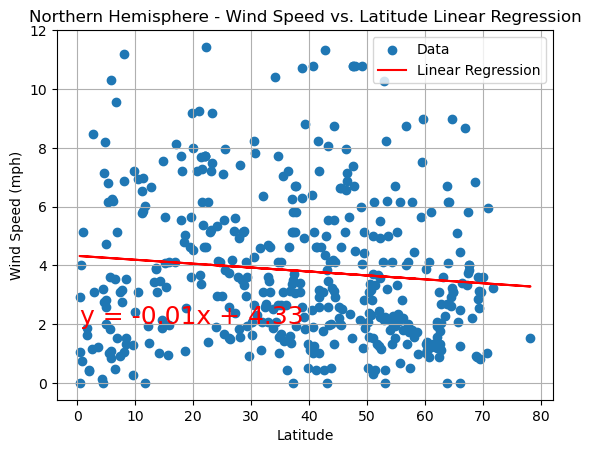

In [45]:
# Northern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

# Print the regression results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared value: {r_value**2}")

# Plot the scatter plot
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], label='Data')

# Plot the regression line
plt.plot(northern_hemi_df["Lat"], slope * northern_hemi_df["Lat"] + intercept, color='red', label='Linear Regression')

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.legend()
plt.grid(True)

# Regression equation and R-squared value
equation = f'y = {slope:.2f}x + {intercept:.2f}'
r_squared = f'R-squared: {r_value**2:.2f}'
plt.text(northern_hemi_df["Lat"].min(), northern_hemi_df["Wind Speed"].min() + 2, equation, fontsize=18, color='red')

# Show the plot
plt.show()

Slope: -0.04351925615998547
Intercept: 2.8853974987464293
R-squared value: 0.051613542632035644


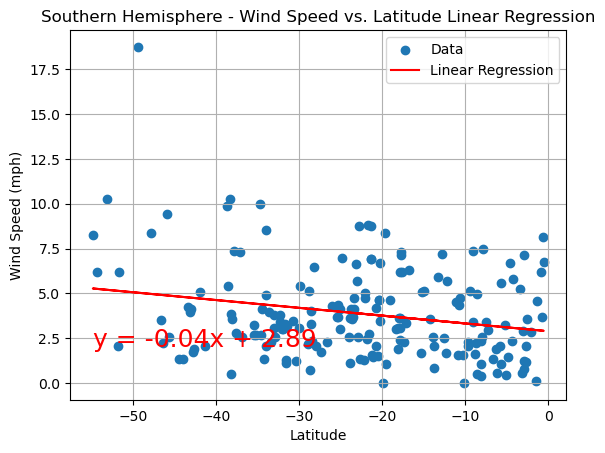

In [46]:
# Southern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

# Print the regression results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared value: {r_value**2}")

# Plot the scatter plot
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], label='Data')

# Plot the regression line
plt.plot(southern_hemi_df["Lat"], slope * southern_hemi_df["Lat"] + intercept, color='red', label='Linear Regression')

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.legend()
plt.grid(True)

# Regression equation and R-squared value
equation = f'y = {slope:.2f}x + {intercept:.2f}'
r_squared = f'R-squared: {r_value**2:.2f}'
plt.text(southern_hemi_df["Lat"].min(), southern_hemi_df["Wind Speed"].min() + 2, equation, fontsize=18, color='red')

# Show the plot
plt.show()

**Discussion about the linear relationship:** 

In the Northern Hemisphere, we found that as you move further away from the equator, wind speed tends to decrease slightly. The data showed a weak negative correlation between wind speed and latitude, with about 5.16% of the variability in wind speed being explained by latitude. So, latitude does have some influence on wind speed up north.

Down in the Southern Hemisphere, we saw a similar trend. Wind speed also decreases a bit as you head towards higher latitudes. The data revealed a weak negative correlation here as well, but only about 1.06% of the variability in wind speed could be explained by latitude. S
o, latitude doesn't play as big of a role in wind speed down south.
Overall, it's interesting to see how wind speed changes with latitude in different parts of the world. Both hemispheres show a similar pattern, but the extent to which latitude affects wind speed varies. Just goes to show that Mother Nature likes to keep us on our toes!